# 線形回帰チュートリアル

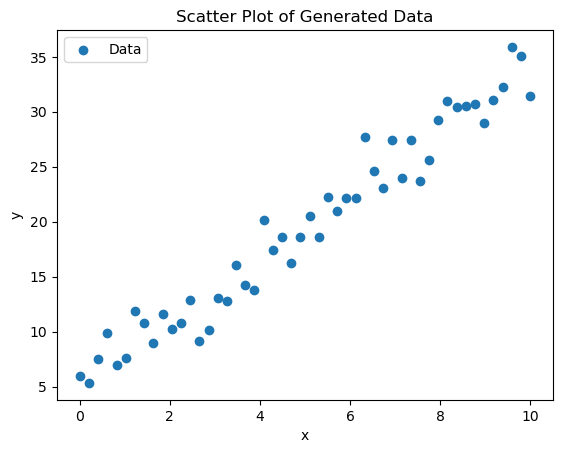

In [ ]:
"""ダミーデータの作成"""
import numpy as np
import matplotlib.pyplot as plt

# 乱数のシードを設定
np.random.seed(42)

# データセットの作成（50サンプル）
x = np.linspace(0, 10, 50)  # 0 から 10 まで等間隔に50個のデータ点
epsilon = np.random.randn(50) * 2  # ノイズ（標準正規分布 * 2）

"""ダミーデータを変えたい時はここを弄ろう"""
y = 3 * x + 5 + epsilon  # 真の線形モデル y = 3x + 5 + ノイズ

# データの可視化
plt.scatter(x, y, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Generated Data")
plt.legend()
plt.show()

In [2]:
from scipy.stats import linregress

# 線形回帰の実行
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 推定されたパラメータ
print(f"回帰係数（傾き）: {slope:.3f}")
print(f"切片: {intercept:.3f}")
print(f"決定係数 R²: {r_value**2:.3f}")

回帰係数（傾き）: 2.884
切片: 5.129
決定係数 R²: 0.956


- `r_value`，`p_value`，`std_err`はデータの相関係数，傾きが0としたときの帰無仮説のp値，傾きの標準誤差らしい

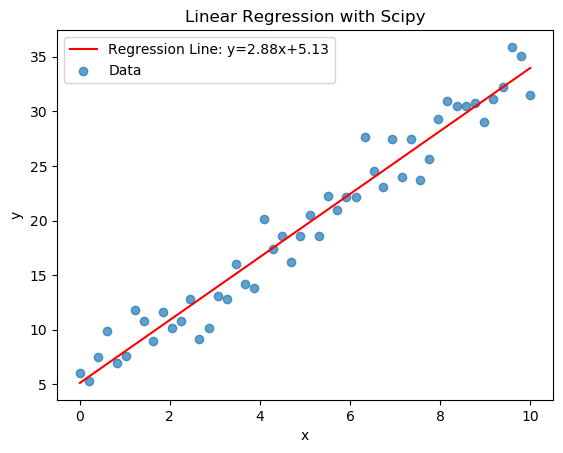

In [ ]:
"""回帰結果を描画する"""
# 回帰直線の計算
y_pred = slope * x + intercept

# 可視化
plt.scatter(x, y, label="Data", alpha=0.7)
plt.plot(x, y_pred, color="red", label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Scipy")
plt.legend()
plt.show()

# 重回帰分析チュートリアル

## curve_fitを用いて非線形最小二乗法により重回帰を行う方法

- Levenberg-Marquardt法と言うニュートン法を拡張した手法を用いて二乗誤差を最小化しているらしい？
- パラメータに対して非線形な関数にも適用可能

In [ ]:
"""テストデータの作成"""
import numpy as np
import matplotlib.pyplot as plt

# 乱数のシードを設定
np.random.seed(42)

# データセットの作成（100サンプル）
n_samples = 100
x1 = np.random.rand(n_samples) * 10  # x1: 0 〜 10 の乱数
x2 = np.random.rand(n_samples) * 10  # x2: 0 〜 10 の乱数
epsilon = np.random.randn(n_samples) * 2  # ノイズ項（標準正規分布）

"""テストデータを変えたいときはここを弄ろう"""
# 真の回帰式
y = 3 * x1 + 2 * x2 + 5 + epsilon

# 特徴量をまとめる
X = np.column_stack((x1, x2))

In [9]:
from scipy.optimize import curve_fit

# 予測モデルを定義（線形モデル）
def linear_model(X, a, b, c):
    x1, x2 = X
    return a * x1 + b * x2 + c

# curve_fit を適用
# 入力データx1とx2は横並びのままtupleにしてしまって良い
params, covariance = curve_fit(linear_model, (x1, x2), y)

# 推定されたパラメータ
a_hat, b_hat, c_hat = params
print(f"推定された係数: a={a_hat:.3f}, b={b_hat:.3f}, c={c_hat:.3f}")

推定された係数: a=2.932, b=2.144, c=4.821


## linalg.lstsqを用いて最小二乗法により重回帰を行う方法

- 所謂逆行列や疑似逆行列によってパラメータを求める方法？
- パラメータに対して線形な場合しか使えない

In [10]:
"""テストデータはcurve_fitの時と同じ物を使う"""
"""バイアス項を追加する"""

from scipy.linalg import lstsq

# バイアス項（1の列）を追加
X_b = np.column_stack((X, np.ones(n_samples)))

# 最小二乗法で解を求める
B_hat, residuals, rank, s = lstsq(X_b, y)

print(f"推定された係数: a={B_hat[0]:.3f}, b={B_hat[1]:.3f}, c={B_hat[2]:.3f}")

推定された係数: a=2.932, b=2.144, c=4.821


# リッジ回帰（Ridge Regression）チュートリアル

## リッジ回帰による線形回帰（シンプルな線形回帰）

In [40]:
"""テストデータの作成"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # データを学習データと推論データに分けるツール
from sklearn.preprocessing import StandardScaler  # 特徴量を標準化する為のツール

# 乱数のシードを設定
np.random.seed(42)

# データセットの作成（100サンプル、5特徴量）
n_samples = 100
n_features = 5
"""特徴量の組を横ベクトルとし，各サンプルデータを縦に並べる"""
X = np.random.randn(n_samples, n_features) * 10  # 特徴量
"""テストデータを変えたい時はここを弄ろう"""
true_coefs = np.array([3, -2, 5, 0, 0])  # 真の係数（スパース性あり）
y = X @ true_coefs + np.random.randn(n_samples) * 2  # ノイズを加えた目的変数

# 訓練データとテストデータに分割（80%: 訓練, 20%: テスト）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徴量の標準化（リッジ回帰では標準化が推奨される）
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)  # 学習データを標準化する
#X_test = scaler.transform(X_test)  # 学習データの平均及び分散に基づいて推論データを標準化する

In [41]:
print(X_train.shape)
print(y_train.shape)

(80, 5)
(80,)


In [42]:
"""sklearn.linear_model.Ridgeを使ってリッジ回帰を実装する"""
from sklearn.linear_model import Ridge

# リッジ回帰モデルを作成（正則化強度 α=1.0）
ridge = Ridge(alpha=1.0)

# モデルの学習
ridge.fit(X_train, y_train)

# 係数の確認
print(f"リッジ回帰の回帰係数: {ridge.coef_}")
print(f"リッジ回帰の切片: {ridge.intercept_}")

リッジ回帰の回帰係数: [ 3.03026619e+00 -1.98064731e+00  5.00609146e+00  9.06505374e-03
 -5.05585353e-04]
リッジ回帰の切片: -0.22389147994786018


In [43]:
"""計算したモデルの性能をR^2スコアで評価"""
from sklearn.metrics import r2_score

# 予測
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# R^2 スコアの計算
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"訓練データ R²: {train_r2:.3f}")
print(f"テストデータ R²: {test_r2:.3f}")

訓練データ R²: 0.999
テストデータ R²: 0.999


### 正則化強度αを交差検証（Cross Validation）によってチューニングするバージョン

- こちらでは`sklearn.linear_model.RidgeCV`を使う

In [45]:
from sklearn.linear_model import RidgeCV

# 交差検証で最適な alpha を決定
alphas = np.logspace(-3, 3, 100)  # 10^-3 から 10^3 まで100個の候補
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# 最適な alpha の確認
print(f"最適な alpha: {ridge_cv.alpha_}")

# 最適なリッジ回帰モデルでの R² スコア
best_train_r2 = ridge_cv.score(X_train, y_train)
best_test_r2 = ridge_cv.score(X_test, y_test)

print(f"最適モデルの訓練データ R²: {best_train_r2:.3f}")
print(f"最適モデルのテストデータ R²: {best_test_r2:.3f}")


最適な alpha: 3.274549162877728
最適モデルの訓練データ R²: 0.999
最適モデルのテストデータ R²: 0.999


### 普通の線形回帰のデータを用意してリッジ回帰と比較してみる

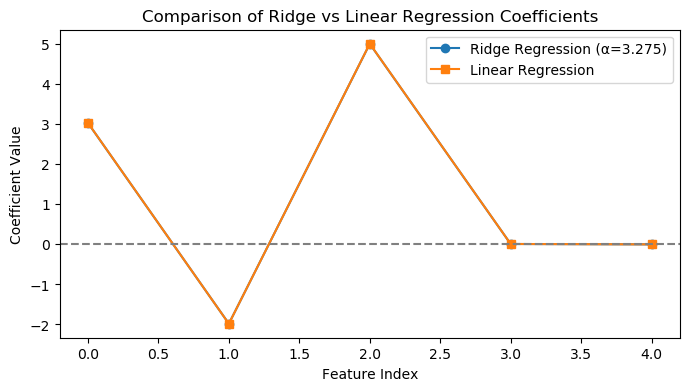

In [46]:
from sklearn.linear_model import LinearRegression

# 通常の線形回帰
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 係数の比較
plt.figure(figsize=(8, 4))
# 二つの選が重なっててリッジ回帰の方の線が見えない
plt.plot(ridge_cv.coef_, label="Ridge Regression (α={:.3f})".format(ridge_cv.alpha_), marker="o")
plt.plot(lin_reg.coef_, label="Linear Regression", marker="s")
plt.axhline(0, linestyle="dashed", color="gray")
plt.legend()
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge vs Linear Regression Coefficients")
plt.show()


- これくらいの例だとどっちも優秀な予測結果を出してしまう（大して差が出ない）

In [48]:
print(ridge_cv.coef_)
print(lin_reg.coef_)

[ 3.02917953e+00 -1.97994224e+00  5.00446603e+00  8.98139921e-03
 -5.20028246e-04]
[ 3.03074418e+00 -1.98095745e+00  5.00680641e+00  9.10186602e-03
 -4.99228325e-04]


## 多項式回帰をリッジ回帰で行う例

- 例えば，特徴量`x1,x2`を多項式データ`x1,x1**2,x1*x2`等の多項式データにしてから回帰分析を行う
- 曲線の様な物も表せる

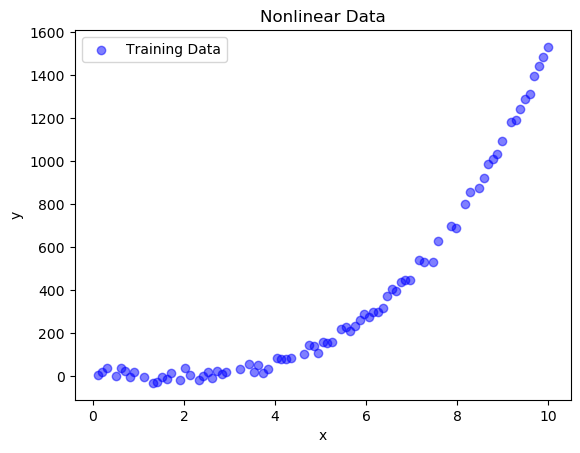

In [49]:
"""テストデータの作成（曲線的なデータにしてみる）"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 乱数のシードを設定
np.random.seed(42)

# データ作成（x は 0 〜 10 の間の 1次元データ）
x = np.linspace(0, 10, 100)
"""テストデータを変えたい時はここを弄ろう"""
y = 2 * x**3 - 5 * x**2 + 3 * x + 7 + np.random.randn(100) * 20  # ノイズ付きの非線形データ

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 1次元データを (n,1) の形に変換（scikit-learn の都合）
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

# データ可視化
plt.scatter(x_train, y_train, label="Training Data", color="blue", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nonlinear Data")
plt.legend()
plt.show()


In [ ]:
"""PolynomialFeaturesを使い，元の特徴量から多項式特徴量を作成する"""
from sklearn.preprocessing import PolynomialFeatures

# 3次の多項式特徴量を作成
degree = 3
# include_bias=Trueにすると定数項が特徴量の中に入る
# 定数項はridge.intercept_として別途計算しているのでここで定数項を入れる必要はない
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# 変換後の特徴量の形を確認
print(f"元の x_train の形状: {x_train.shape}")
print(f"変換後の x_train_poly の形状: {x_train_poly.shape}")

# どの特徴量が含まれているか確認
print("特徴量の名前:", poly.get_feature_names_out())

元の x_train の形状: (80, 1)
変換後の x_train_poly の形状: (80, 3)
特徴量の名前: ['x0' 'x0^2' 'x0^3']


In [61]:
print(x_train)
print(x_train_poly)

[[ 5.55555556]
 [ 8.88888889]
 [ 2.62626263]
 [ 4.24242424]
 [ 6.96969697]
 [ 1.51515152]
 [ 4.04040404]
 [ 9.6969697 ]
 [ 0.90909091]
 [ 7.27272727]
 [ 1.11111111]
 [ 4.74747475]
 [ 8.58585859]
 [ 2.82828283]
 [ 9.39393939]
 [ 0.50505051]
 [ 6.66666667]
 [ 6.56565657]
 [ 3.53535354]
 [ 1.61616162]
 [ 4.94949495]
 [ 3.43434343]
 [ 0.70707071]
 [ 9.5959596 ]
 [ 2.72727273]
 [ 1.91919192]
 [ 8.18181818]
 [ 2.52525253]
 [ 6.26262626]
 [ 1.31313131]
 [ 2.42424242]
 [ 0.3030303 ]
 [ 1.71717172]
 [ 3.83838384]
 [ 0.80808081]
 [ 7.87878788]
 [ 0.60606061]
 [ 6.46464646]
 [ 3.63636364]
 [ 8.98989899]
 [ 5.65656566]
 [10.        ]
 [ 5.45454545]
 [ 4.34343434]
 [ 5.05050505]
 [ 6.76767677]
 [ 4.64646465]
 [ 6.86868687]
 [ 6.16161616]
 [ 9.7979798 ]
 [ 7.97979798]
 [ 4.14141414]
 [ 5.85858586]
 [ 4.84848485]
 [ 9.8989899 ]
 [ 5.75757576]
 [ 7.57575758]
 [ 3.23232323]
 [ 9.49494949]
 [ 5.95959596]
 [ 6.36363636]
 [ 8.48484848]
 [ 3.73737374]
 [ 2.92929293]
 [ 0.1010101 ]
 [ 5.25252525]
 [ 2.12121

In [62]:
"""リッジ回帰を行う"""
from sklearn.linear_model import Ridge

# リッジ回帰モデルを作成（alpha=1.0）
ridge = Ridge(alpha=1.0)

# モデルの学習
ridge.fit(x_train_poly, y_train)

# 係数と切片を確認
print(f"切片（intercept）: {ridge.intercept_:.3f}")

# 係数の確認
feature_names = poly.get_feature_names_out()
for name, coef in zip(feature_names, ridge.coef_):
    print(f"特徴量 {name} の係数: {coef:.3f}")

切片（intercept）: 16.030
特徴量 x0 の係数: -10.420
特徴量 x0^2 の係数: -1.836
特徴量 x0^3 の係数: 1.801


- 何やら計算結果が元の係数と一致しないが，とりあえずR^2スコアで評価してみる

訓練データ R²: 0.998
テストデータ R²: 0.998


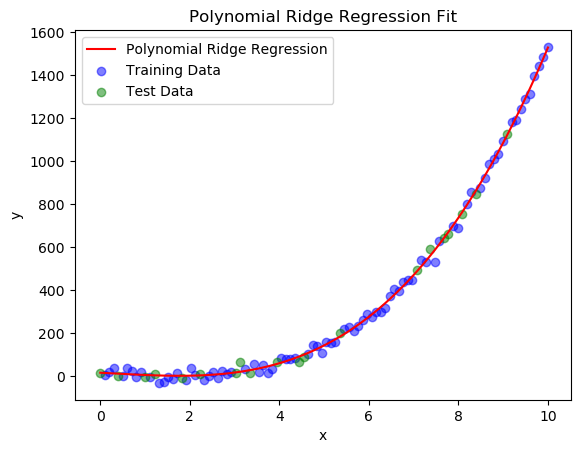

In [63]:
from sklearn.metrics import r2_score

# 予測
y_train_pred = ridge.predict(x_train_poly)
y_test_pred = ridge.predict(x_test_poly)

# R^2 スコアの計算
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"訓練データ R²: {train_r2:.3f}")
print(f"テストデータ R²: {test_r2:.3f}")

# 可視化
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = ridge.predict(x_range_poly)

plt.scatter(x_train, y_train, label="Training Data", color="blue", alpha=0.5)
plt.scatter(x_test, y_test, label="Test Data", color="green", alpha=0.5)
plt.plot(x_range, y_range_pred, label="Polynomial Ridge Regression", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Ridge Regression Fit")
plt.legend()
plt.show()

- 何かそれなりにフィッティングは出来ている

### 入力変数を`x1,x2`の様に複数個にしてみる

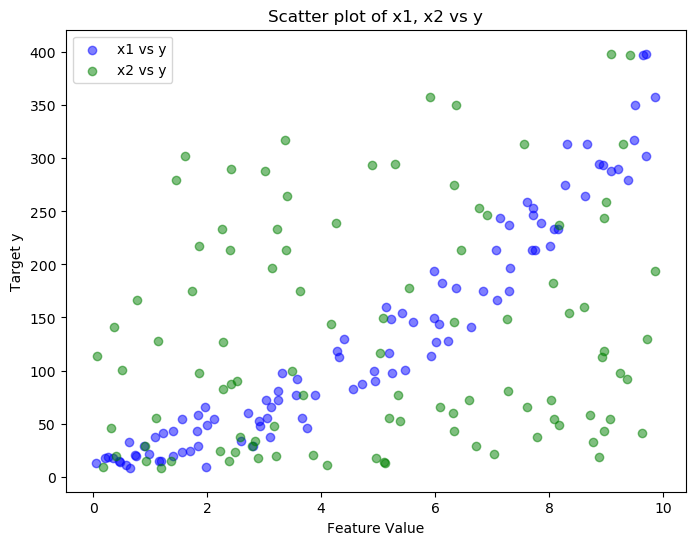

In [65]:
"""データの作成"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 乱数のシードを設定
np.random.seed(42)

# データの作成（100サンプル, 2つの特徴量）
n_samples = 100
x1 = np.random.rand(n_samples) * 10  # x1: 0 〜 10 の乱数
x2 = np.random.rand(n_samples) * 10  # x2: 0 〜 10 の乱数

# 目的変数 y を非線形な関数で作成
y = 3*x1**2 + 2*x2 + x1*x2 + 5 + np.random.randn(n_samples) * 5  # ノイズあり

# 特徴量を統合
X = np.column_stack((x1, x2))

# 訓練データとテストデータに分割（80%: 訓練, 20%: テスト）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 散布図でデータの分布を確認
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label="x1 vs y", color="blue", alpha=0.5)
plt.scatter(x2, y, label="x2 vs y", color="green", alpha=0.5)
plt.xlabel("Feature Value")
plt.ylabel("Target y")
plt.title("Scatter plot of x1, x2 vs y")
plt.legend()
plt.show()

In [66]:
"""多項式特徴量を生成する"""
from sklearn.preprocessing import PolynomialFeatures

# 2次の多項式特徴量を作成（x1, x2 → x1, x2, x1^2, x2^2, x1*x2）
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 変換後の特徴量の形を確認
print(f"元の X_train の形状: {X_train.shape}")
print(f"変換後の X_train_poly の形状: {X_train_poly.shape}")

# どの特徴量が含まれているか確認
print("特徴量の名前:", poly.get_feature_names_out())

元の X_train の形状: (80, 2)
変換後の X_train_poly の形状: (80, 5)
特徴量の名前: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


In [67]:
"""リッジ回帰をしてみる"""
from sklearn.linear_model import Ridge

# リッジ回帰モデルを作成（alpha=1.0）
ridge = Ridge(alpha=1.0)

# モデルの学習
ridge.fit(X_train_poly, y_train)

# 各特徴量の係数を確認
feature_names = poly.get_feature_names_out()
for name, coef in zip(feature_names, ridge.coef_):
    print(f"特徴量 {name} の係数: {coef:.3f}")

特徴量 x0 の係数: 0.384
特徴量 x1 の係数: 1.187
特徴量 x0^2 の係数: 2.939
特徴量 x0 x1 の係数: 1.017
特徴量 x1^2 の係数: 0.112


- また元の係数値とズレが残るがとりあえずR^2スコアで評価してみる

In [ ]:
from sklearn.metrics import r2_score

# 予測
y_train_pred = ridge.predict(X_train_poly)
y_test_pred = ridge.predict(X_test_poly)

# R^2 スコアの計算
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"訓練データ R²: {train_r2:.3f}")
print(f"テストデータ R²: {test_r2:.3f}")

訓練データ R²: 0.998
テストデータ R²: 0.998


- 予測は割と正しく出来ているっぽい

- 普通の線形回帰での予測結果と比較してみる

In [72]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 通常の線形回帰モデル
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# 係数をデータフレームとして整理
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Ridge Coefficient": ridge.coef_,
    "Linear Coefficient": lin_reg.coef_
})

# Jupyter Notebook なら display(), それ以外なら print()
try:
    from IPython.display import display  # Jupyter Notebook なら表として表示
    display(coef_df)
except ImportError:
    print(coef_df)  # 通常の環境なら print()


,Feature,Ridge Coefficient,Linear Coefficient
0,x0,0.383730,0.391637
1,x1,1.186554,1.223038
2,x0^2,2.939407,2.939161
3,x0 x1,1.016582,1.015616
4,x1^2,0.112339,0.109343
